**Imports**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# **DATA (12V)**

In [3]:
I = [
    0.01596, 0.01586, 0.01576, 0.01554, 0.01495, 0.01459, 0.01423, 0.01407, 0.01328, 0.01299,
    0.01271, 0.01259, 0.01196, 0.01138, 0.01086, 0.01039, 0.00995, 0.00956, 0.00885, 0.00824,
    0.0077, 0.00724, 0.00682, 0.0053, 0.00435, 0.00367, 0.00318, 0.0028, 0.00251, 0.00227
] # [Amperes]

V = [
    11.9, 11.82, 11.75, 11.59, 11.16, 10.89, 10.63, 10.51, 9.93, 9.71,
    9.1, 9.42, 8.95, 8.53, 8.14, 7.79, 7.46, 7.17, 6.65, 6.19,
    5.79, 5.44, 5.13, 4, 3.28, 2.78, 2.41, 2.12, 1.91, 1.72
] # [Volts]

# Escala de resistencias

R = [
    0, 5, 10, 20, 50, 70, 90, 100, 150, 170,
    190, 200, 250, 300, 350, 400, 450, 500, 600, 700,
    800, 900, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500
] # ohm

**Tabla de datos**

In [4]:


# Índices
indices = list(range(1, 31))
print(f"{'Índice':<10}{'Resistencia (Ω)':<20}{'Voltaje (V)':<15}{'Corriente (A)':<15}")
for i in range(len(indices)):
    print(f"{indices[i]:<10}{R[i]:<20}{V[i]:<15}{I[i]:<15}")

Índice    Resistencia (Ω)     Voltaje (V)    Corriente (A)  
1         0                   11.9           0.01596        
2         5                   11.82          0.01586        
3         10                  11.75          0.01576        
4         20                  11.59          0.01554        
5         50                  11.16          0.01495        
6         70                  10.89          0.01459        
7         90                  10.63          0.01423        
8         100                 10.51          0.01407        
9         150                 9.93           0.01328        
10        170                 9.71           0.01299        
11        190                 9.1            0.01271        
12        200                 9.42           0.01259        
13        250                 8.95           0.01196        
14        300                 8.53           0.01138        
15        350                 8.14           0.01086        
16        400           

**Desviación Estándar**

In [5]:
import statistics

sigma = statistics.stdev(I)
print(f"La desviación estándar es: {sigma:.3f}")

La desviación estándar es: 0.005


In [10]:
import statistics

sigma = statistics.stdev(I)
print(f"La desviación estándar es: {sigma:.5f}")

La desviación estándar es: 0.00451


**Promedio de datos**

In [6]:
prom=np.mean(I)
print(f"El promedio es: {prom:.3f}")

El promedio es: 0.010


In [9]:
sumaI=sum(I)
namberdata=30
promediox=sumaI/namberdata
print(promediox)

0.009985333333333334


In [17]:
sumaI=sum(V)
namberdata=30
promediox=sumaI/namberdata
print(promediox)

7.4623333333333335


In [16]:
import math

def desviacion_estandar(datos):
    # Calcular la media
    n = len(datos)
    media = sum(datos) / n
    
    # Calcular la suma de los cuadrados de las diferencias con la media
    suma_cuadrados = sum((x - media) ** 2 for x in datos)
    
    # Calcular la desviación estándar (para una muestra, usa n-1)
    desviacion = math.sqrt(suma_cuadrados / (n - 1))
    
    return desviacion


resultado = desviacion_estandar(I)
print(f"La desviación estándar es: {resultado:.5f}")


La desviación estándar es: 0.00451


In [18]:
import math

def desviacion_estandar(datos):
    # Calcular la media
    n = len(datos)
    media = sum(datos) / n
    
    # Calcular la suma de los cuadrados de las diferencias con la media
    suma_cuadrados = sum((x - media) ** 2 for x in datos)
    
    # Calcular la desviación estándar (para una muestra, usa n-1)
    desviacion = math.sqrt(suma_cuadrados / (n - 1))
    
    return desviacion


resultado = desviacion_estandar(V)
print(f"La desviación estándar es: {resultado:.5f}")

La desviación estándar es: 3.34451


In [21]:
import numpy as np
from scipy.optimize import minimize

# Datos de voltaje observado, corriente y la incertidumbre asociada
V_observado = np.array([
    11.9, 11.82, 11.75, 11.59, 11.16, 10.89, 10.63, 10.51, 9.93, 9.71,
    9.1, 9.42, 8.95, 8.53, 8.14, 7.79, 7.46, 7.17, 6.65, 6.19,
    5.79, 5.44, 5.13, 4, 3.28, 2.78, 2.41, 2.12, 1.91, 1.72
])  # Voltajes observados
I_observado = np.array([
    11.9, 11.82, 11.75, 11.59, 11.16, 10.89, 10.63, 10.51, 9.93, 9.71,
    9.1, 9.42, 8.95, 8.53, 8.14, 7.79, 7.46, 7.17, 6.65, 6.19,
    5.79, 5.44, 5.13, 4, 3.28, 2.78, 2.41, 2.12, 1.91, 1.72
])  # Corrientes observadas
sigma_V = np.full(len(V_observado), 0.00451)  # Incertidumbre del voltaje (supón que es la misma para todos)

# Función chi-cuadrado a minimizar
def chi_cuadrado(R):
    V_predicho = I_observado * R  # Modelo basado en la ley de Ohm
    chi2 = np.sum(((V_observado - V_predicho) ** 2) / sigma_V**2)
    return chi2

# Minimización para encontrar el valor de R que minimiza el chi-cuadrado
resultado = minimize(chi_cuadrado, x0=750)  # x0 es una estimación inicial para R
R_optimo = resultado.x[0]

print(f"El valor óptimo de R que minimiza el chi-cuadrado es: {R_optimo:.4f} ohmios")


El valor óptimo de R que minimiza el chi-cuadrado es: 1.0000 ohmios


# **Análisis**

El valor de Rv que minimiza χ² es: 746.3312530525358 [Ω]
El valor de Rv que minimiza χ²  es: 746.3312530525358 [Ω]
χ² reducido: 0.005837827983775015
El valor mínimo del χ² es: 0.17513483951325046


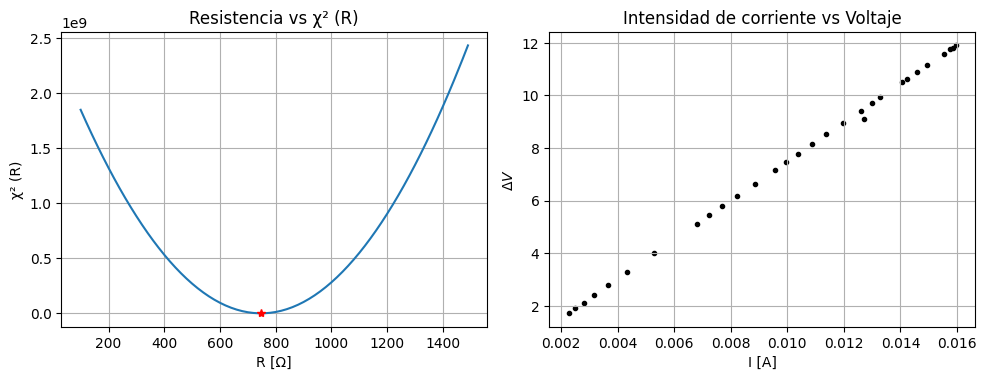

In [7]:
I=np.array([
    0.01596, 0.01586, 0.01576, 0.01554, 0.01495, 0.01459, 0.01423, 0.01407, 0.01328, 0.01299,
    0.01271, 0.01259, 0.01196, 0.01138, 0.01086, 0.01039, 0.00995, 0.00956, 0.00885, 0.00824,
    0.0077, 0.00724, 0.00682, 0.0053, 0.00435, 0.00367, 0.00318, 0.0028, 0.00251, 0.00227
]) # mA

V=np.array([
    11.9, 11.82, 11.75, 11.59, 11.16, 10.89, 10.63, 10.51, 9.93, 9.71,
    9.1, 9.42, 8.95, 8.53, 8.14, 7.79, 7.46, 7.17, 6.65, 6.19,
    5.79, 5.44, 5.13, 4, 3.28, 2.78, 2.41, 2.12, 1.91, 1.72
]) # VOLTS

xi2=[]
Re_v=[]
V_t1=[]
Mod=[]
for Rv in range(100,1500,10):
    j=0.00451
    xi=(sum((np.array(V)-np.array(I)*Rv))**2/j**2)
    xi2.append(xi)
    Re_v.append(Rv)
    Mod.append(np.array(I)*Rv)
# Función objetivo que se debe minimizar
def modelo(Rv):
    return np.sum((V - I * Rv)**2)
# Establecer un valor inicial para Rv
valor_inicial_Rv = 750  # Valor Resistencia dada por fabricante
# Utilizar minimize para encontrar Rv que minimice la función objetivo
resultado = optimize.minimize(modelo, valor_inicial_Rv)
# El valor de Rv que minimiza la función objetivo
Rv_min = resultado.x[0]
print("El valor de Rv que minimiza \u03C7\u00B2 es:", Rv_min,"[\u03A9]")
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
plt.plot(Re_v,xi2,Rv_min,0, '*r')
#plt.plot(Rv_min,0, '*g')
plt.grid(True)
plt.xlabel("R [\u03A9]")
plt.ylabel("\u03C7\u00B2 (R)")
plt.title("Resistencia vs \u03C7\u00B2 (R)")
#plt.figure(figsize=(5,3))
plt.subplot(2,2,2)
plt.scatter(I,V,marker=".",color="black")
plt.xlabel(f"I [A]");plt.ylabel(r'$\Delta V$')
plt.title("Intensidad de corriente vs Voltaje")
plt.grid(True)
plt.tight_layout()

# Calcular chi cuadrado reducido
xi2= modelo(Rv_min)
grados_de_libertad = len(V) - 1
xi_red = xi2 / len(V)
xi2_min=resultado.fun
print("El valor de Rv que minimiza \u03C7\u00B2  es:", Rv_min, "[Ω]")
print("\u03C7\u00B2 reducido:", xi_red)
# Xi cuadrado minimo
xi2_min = resultado.fun
print("El valor mínimo del \u03C7\u00B2 es:", xi2_min)

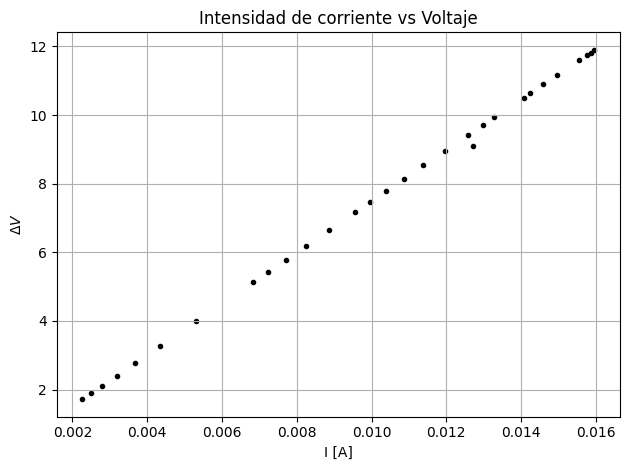

In [8]:
plt.scatter(I,V,marker=".",color="black")
plt.xlabel(f"I [A]");plt.ylabel(r'$\Delta V$')
plt.title("Intensidad de corriente vs Voltaje")
plt.grid(True)
plt.tight_layout()
